In [1]:
import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from keras.utils import to_categorical

In [2]:
with open('data_2.pkl', 'rb') as f:
    (input_train, target_train), (input_test, target_test) = pkl.load(f)

In [3]:
deceases = []
deceases_dic = {}
for i in range(len(target_test)):
    if target_test[i] not in deceases:
        deceases.append(target_test[i])
        
for i in range(len(deceases)):
    deceases_dic.update({deceases[i]: i})
    
print(deceases_dic)
for i in range(len(target_train)):
    if i < len(target_test):
        target_test[i] = deceases_dic[target_test[i]]
    target_train[i] = deceases_dic[target_train[i]]

{'Hernia': 0, 'Pleural_Thickening': 1, 'Infiltration': 2, 'Pneumothorax': 3, 'Effusion': 4, 'Mass': 5, 'Emphysema': 6, 'Cardiomegaly': 7, 'Consolidation': 8, 'Edema': 9, 'Atelectasis': 10, 'Fibrosis': 11, 'Pneumonia': 12, 'Nodule': 13}


In [4]:
target_train = to_categorical(target_train,num_classes=14)
target_test = to_categorical(target_test,num_classes=14)

In [5]:
input_train = np.array(input_train, dtype=np.float32)
input_test = np.array(input_test, dtype=np.float32)
target_train = np.array(target_train ,dtype=np.float32)
target_test = np.array(target_test,dtype=np.float32)

In [6]:
input_test = input_test / 255
input_train = input_train / 255

In [7]:
imgen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
)
imgen.fit(input_train)

In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation= 'relu',padding = 'same',input_shape= (64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation= 'relu'))

model.add(Flatten())
model.add(Dense(256,activation= 'relu',kernel_regularizer='l2'))
model.add(Dense(14,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,768,846 (56.34 MB)

 Trainable params: 14,768,846 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
fit = model.fit(input_train,target_train,
                batch_size=32,validation_split=0.2,
                verbose=1,epochs=10)

Epoch 1/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 92s 156ms/step - accuracy: 0.2756 - loss: 3.0182 - val_accuracy: 0.4123 - val_loss: 2.0561
Epoch 2/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 88s 154ms/step - accuracy: 0.2915 - loss: 2.2071 - val_accuracy: 0.4219 - val_loss: 2.0391
Epoch 3/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 83s 145ms/step - accuracy: 0.2924 - loss: 2.1925 - val_accuracy: 0.4312 - val_loss: 1.9952
Epoch 4/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 83s 145ms/step - accuracy: 0.2932 - loss: 2.1864 - val_accuracy: 0.4273 - val_loss: 1.9877
Epoch 5/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 83s 144ms/step - accuracy: 0.2966 - loss: 2.1585 - val_accuracy: 0.4223 - val_loss: 1.9736
Epoch 6/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 88s 153ms/step - accuracy: 0.2999 - loss: 2.1631 - val_accuracy: 0.4275 - val_loss: 1.9482
Epoch 7/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 93s 162ms/step - accuracy: 0.2965 - loss: 2.1539 - val_accuracy: 0.4234 - val_loss: 1.9836
Epoch 8/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 91s 159ms/step - accuracy: 0.3021 - loss: 2

In [10]:
score = model.evaluate(input_test,target_test,batch_size=32,verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2154 - loss: 4.1638
Test loss: 4.257910251617432 / Test accuracy: 0.21902377903461456


In [11]:
pred = model.predict(input_test)
pred = np.argmax(pred , axis=1)
target_test = np.argmax(target_test , axis=1)

conf_matrix = tf.math.confusion_matrix(target_test, pred)
print(conf_matrix)

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
tf.Tensor(
[[   0    1   24    0    4    2    1    0    1    0   10    1    0    1]
 [   0    7  127    9   50   19    3    3    6   11   41    2    0   31]
 [   0    7 1097   41  294  121   31   18  100  106  285   21    0   99]
 [   0   13  434   49  128   74   14    8   20   23   98   11    1   79]
 [   0    7  468   29  270   56    8   21   41   53  158   12    0   44]
 [   0    6  207   10   56   50    3    1   14    9   44    5    0   38]
 [   0    3  150   11   34   17   10    3    7    8   37    1    0   24]
 [   0    2  137    3   44   23    1   25   10   10   42    5    0   14]
 [   0    0  221    7   74   26    1    5   25   32   68    4    0   18]
 [   0    1  115    3   44    7    2    1   16   18   14    1    0    8]
 [   0    8  332   20  104   46   16    7   21   29  158    6    1   53]
 [   0    1   68    6   29   18    6    3    0    3   20    5    1   16]
 [   0    0   45    0   10    3    1    2    3    4   14    2    0    4

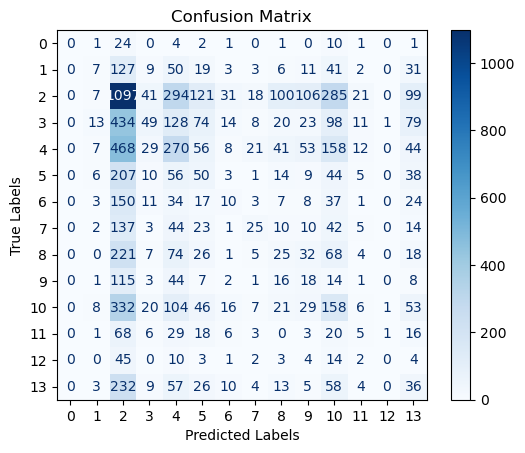

In [12]:
conf_matrix = conf_matrix.numpy()
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

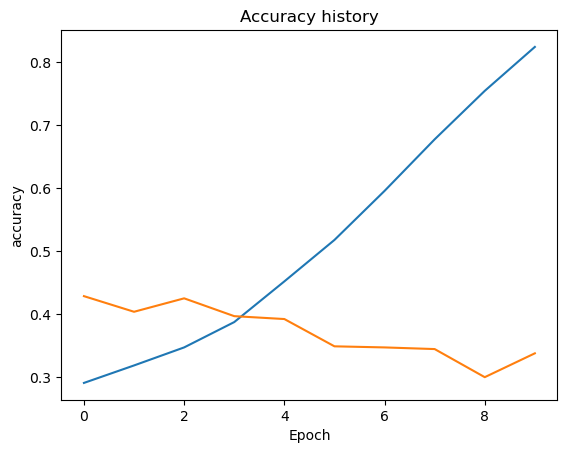

In [13]:
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Accuracy history')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

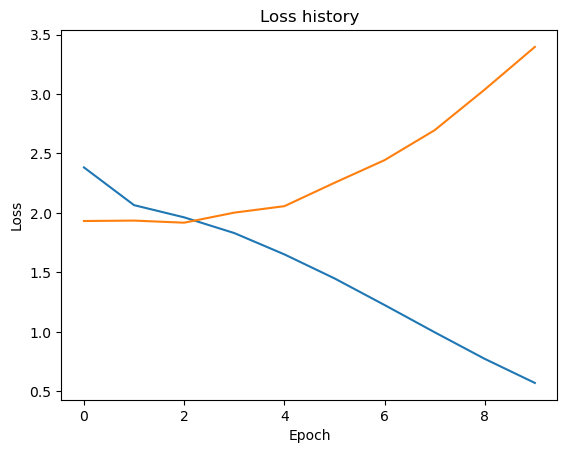

In [14]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Loss history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()